<a href="https://colab.research.google.com/github/mralamdari/NLP-Text-Processing/blob/main/NLP_Text_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import os
import bs4
import nltk
import datetime
import numpy as np
from urllib.request import urlopen

#HTML Parsing
###Extracting text from HTML


## WebScrapping using BeautifulSoup

In [2]:
my_url = 'https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons'

In [3]:
html = urlopen(my_url).read()

In [4]:
html

b'<!DOCTYPE html>\r\n\r\n\r\n    <html itemscope itemtype="https://schema.org/QAPage" class="html__responsive " lang="en">\r\n\r\n    <head>\r\n\r\n        <title>python - Deep-Learning Nan loss reasons - Stack Overflow</title>\r\n        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">\r\n        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">\r\n        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> \r\n        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">\r\n        <link rel="canonical" href="https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons" />\r\n    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">\r\n        <meta property="og:type

In [5]:
soupfield = bs4.BeautifulSoup(html, 'html.parser')

In [6]:
print(soupfield.prettify()[:2000])

<!DOCTYPE html>
<html class="html__responsive " itemscope="" itemtype="https://schema.org/QAPage" lang="en">
 <head>
  <title>
   python - Deep-Learning Nan loss reasons - Stack Overflow
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <link href="https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons" rel="canonical">
   <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
   <meta content="website" property="og:type">
    <meta content="https://stackoverflow.com/questions/40050397/

In [7]:
soupfield.title

<title>python - Deep-Learning Nan loss reasons - Stack Overflow</title>

In [8]:
question = soupfield.find('div', {'class':'question'})
questiontext = question.find("div", {"class": "s-prose js-post-body"})

In [9]:
questiontext.get_text().strip()

'Perhaps too general a question, but can anyone explain what would cause a Convolutional Neural Network to diverge?\nSpecifics:\nI am using Tensorflow\'s iris_training model with some of my own data and keep getting\n\nERROR:tensorflow:Model diverged with loss = NaN.\nTraceback...\ntensorflow.contrib.learn.python.learn.monitors.NanLossDuringTrainingError: NaN loss during training.\n\nTraceback originated with line:\n tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,\n                                        hidden_units=[300, 300, 300],\n                                        #optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.001, l1_regularization_strength=0.00001),                                                          \n                                        n_classes=11,\n                                        model_dir="/tmp/iris_model")\n\nI\'ve tried adjusting the optimizer, using a zero for learning rate, and using no optimizer. Any insights into net

In [10]:
answer = soupfield.find('div', {'class':'answer'})
answertext = answer.find("div", {"class": "s-prose js-post-body"})

In [11]:
answertext.get_text().strip()

"There are lots of things I have seen make a model diverge.\n\nToo high of a learning rate.  You can often tell if this is the case if the loss begins to increase and then diverges to infinity.  \nI am not to familiar with the DNNClassifier but I am guessing it uses the categorical cross entropy cost function.  This involves taking the log of the prediction which diverges as the prediction approaches zero.  That is why people usually add a small epsilon value to the prediction to prevent this divergence. I am guessing the DNNClassifier probably does this or uses the tensorflow opp for it.  Probably not the issue.\nOther numerical stability issues can exist such as division by zero where adding the epsilon can help.  Another less obvious one if the square root who's derivative can diverge if not properly simplified when dealing with finite precision numbers. Yet again I doubt this is the issue in the case of the DNNClassifier.\nYou may have an issue with the input data.  Try calling ass

#Extracting text from images

In [25]:
!pip install --ignore-installed Pillow==9.0.0

In [19]:
!sudo apt install tesseract-ocr


!wget https://metalbyexample.com/wp-content/uploads/figure-65.png
# https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch2/OpenSource.png
# https://raw.githubusercontent.com/AnirudhMergu/TesseractOCR/master/sample3.png

--2022-05-15 06:24:27--  https://metalbyexample.com/wp-content/uploads/figure-65.png
Resolving metalbyexample.com (metalbyexample.com)... 173.230.130.152
Connecting to metalbyexample.com (metalbyexample.com)|173.230.130.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109894 (107K) [image/png]
Saving to: ‘figure-65.png.4’

figure-65.png.4     100%[===================>] 107.32K  --.-KB/s    in 0.03s   

2022-05-15 06:24:27 (3.33 MB/s) - ‘figure-65.png.4’ saved [109894/109894]



In [22]:
import PIL
from pytesseract import image_to_string

filename = 'figure-65.png'

if (os.name) == "nt":  #Windows
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,309 k

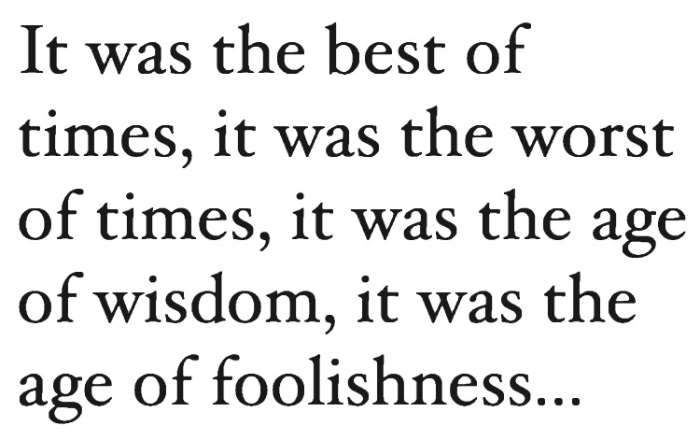

In [23]:
# !pip install Pillow==9.0.0
img = PIL.Image.open(filename)
img

In [24]:
image_to_string(PIL.Image.open(filename))

'It was the best of\ntimes, it was the worst\nof times, it was the age\nof wisdom, it was the\nage of foolishness...\n\x0c'